<a href="https://colab.research.google.com/github/shahad-jeza/kaust_training/blob/main/summer_basic_code/generate_text_using_N_grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk kaggle

In [2]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/path/to/your/kaggle.json'

# Download the dataset
!kaggle datasets download -d jrobischon/wikipedia-movie-plots

# Unzip the dataset
import zipfile
with zipfile.ZipFile('wikipedia-movie-plots.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

Dataset URL: https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots
License(s): CC-BY-SA-4.0
100% 29.9M/29.9M [00:00<00:00, 103MB/s] 
100% 29.9M/29.9M [00:00<00:00, 92.7MB/s]


In [3]:
import numpy as np
import pandas as pd
import nltk
from collections import defaultdict
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [4]:
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [5]:
df = pd.read_csv('data/wiki_movie_plots_deduped.csv')

In [6]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [7]:
# Concatenate all plot summaries into one text
text = ' '.join(df['Plot'].astype(str).tolist())

In [8]:
# Preprocess the text
tokens = word_tokenize(text.lower())
print(f'Total tokens: {len(tokens)}')

Total tokens: 14986372


In [9]:
# generate N-grams
def generate_ngrams(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

In [10]:
# Generate bigrams (N=2)
N = 2
ngrams = generate_ngrams(tokens, N)
print(f'Total {N}-grams: {len(ngrams)}')

Total 2-grams: 14986371


In [11]:
# Build N-gram Model
ngram_model = defaultdict(lambda: defaultdict(lambda: 0))

for i in range(len(tokens) - N):
    ngram = ' '.join(tokens[i:i+N-1])
    next_word = tokens[i+N-1]
    ngram_model[ngram][next_word] += 1

In [12]:
#  Normalize the Frequencies
for ngram, next_words in ngram_model.items():
    total_count = float(sum(next_words.values()))
    for word in next_words:
        ngram_model[ngram][word] /= total_count

In [13]:
# generate text
def generate_text(ngram_model, start_text, num_words):
    current_ngram = ' '.join(word_tokenize(start_text.lower())[:N-1])
    generated_text = start_text

    for _ in range(num_words):
        if current_ngram not in ngram_model:
            break
        next_word = np.random.choice(list(ngram_model[current_ngram].keys()), p=list(ngram_model[current_ngram].values()))
        generated_text += ' ' + next_word
        current_ngram = ' '.join(generated_text.split()[-(N-1):])

    return generated_text

In [14]:
# Generate a text sequence starting with a given seed text
start_text = "Once upon"
num_words_to_generate = 20
generated_text = generate_text(ngram_model, start_text, num_words_to_generate)
print("Generated Text:\n", generated_text)

Generated Text:
 Once upon more than his showman . arriving in musan , comes to go with his loved many lives comfortably settled in


In [15]:
def evaluate_generated_text(generated_text):
    # Example heuristic: count the number of real words in the generated text
    real_words_count = sum(1 for word in word_tokenize(generated_text) if word in nltk.corpus.words.words())
    return real_words_count / len(word_tokenize(generated_text))

evaluation_score = evaluate_generated_text(generated_text)
print("Evaluation Score:", evaluation_score)

Evaluation Score: 0.6818181818181818


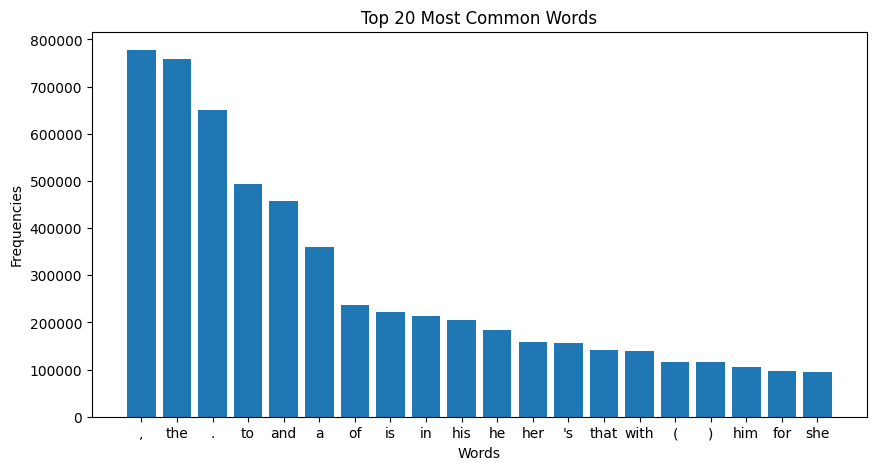

In [16]:
def plot_word_frequencies(tokens, top_n=20):
    freq_dist = nltk.FreqDist(tokens)
    most_common = freq_dist.most_common(top_n)

    words = [word for word, _ in most_common]
    frequencies = [freq for _, freq in most_common]

    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies)
    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.title(f'Top {top_n} Most Common Words')
    plt.show()

# Plot the top 20 most common words
plot_word_frequencies(tokens, top_n=20)